In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
%config InlineBackend.figure_format = 'retina'
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

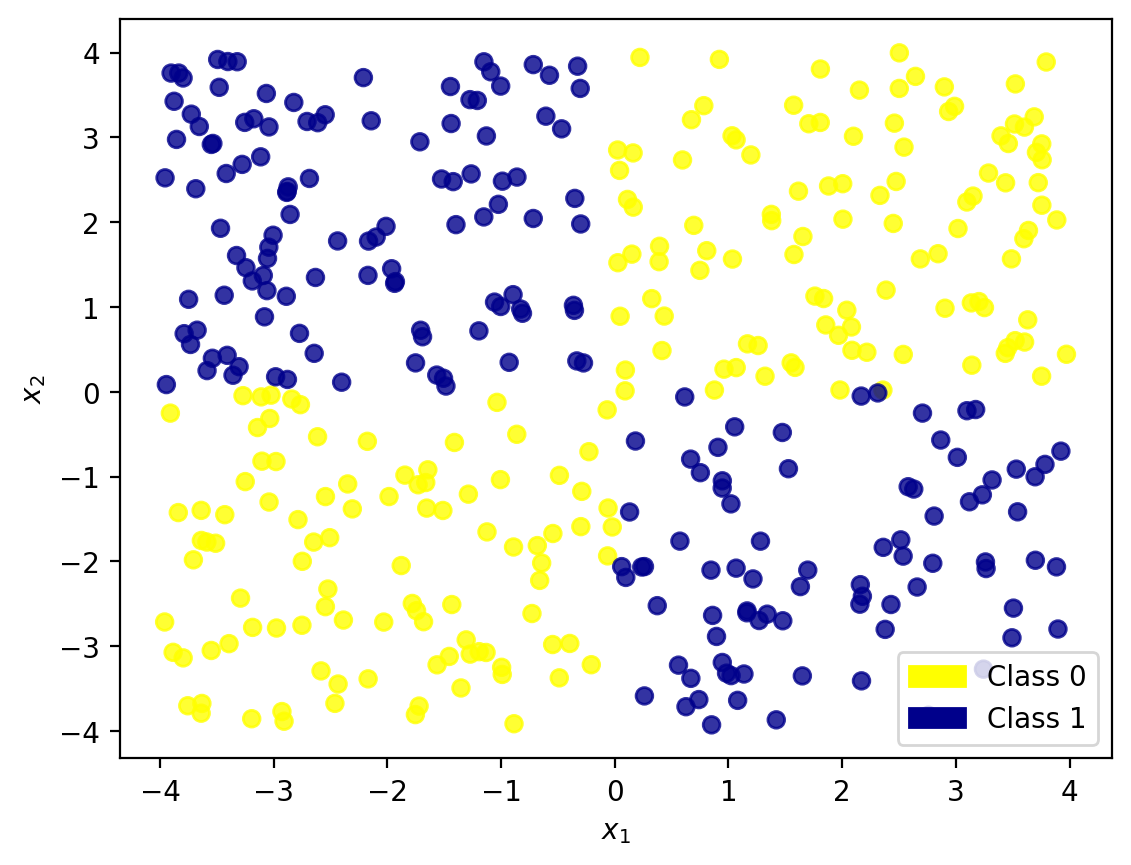

In [ ]:
np.random.seed(42)
x = np.random.uniform(low=-4, high=4, size=(400,2))
y = np.bitwise_xor((x[:,0]>0),(x[:,1]>0)).astype(int) + ((x[:,0]==0)&(x[:,1]<0)).astype(int) + ((x[:,0]<0)&(x[:,1]==0)).astype(int)
colors = ['yellow' if label == 0 else 'darkblue' for label in y]
plt.scatter(x[:,0],x[:,1], c=colors, alpha=0.8)
yellow_patch = mpatches.Patch(color='yellow', label='Class 0')
blue_patch = mpatches.Patch(color='darkblue', label='Class 1')
plt.legend(handles=[yellow_patch, blue_patch])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Train set shape: (200, 2) (200,)
Test set shape: (200, 2) (200,)


Text(0.5, 1.0, 'Training Data')

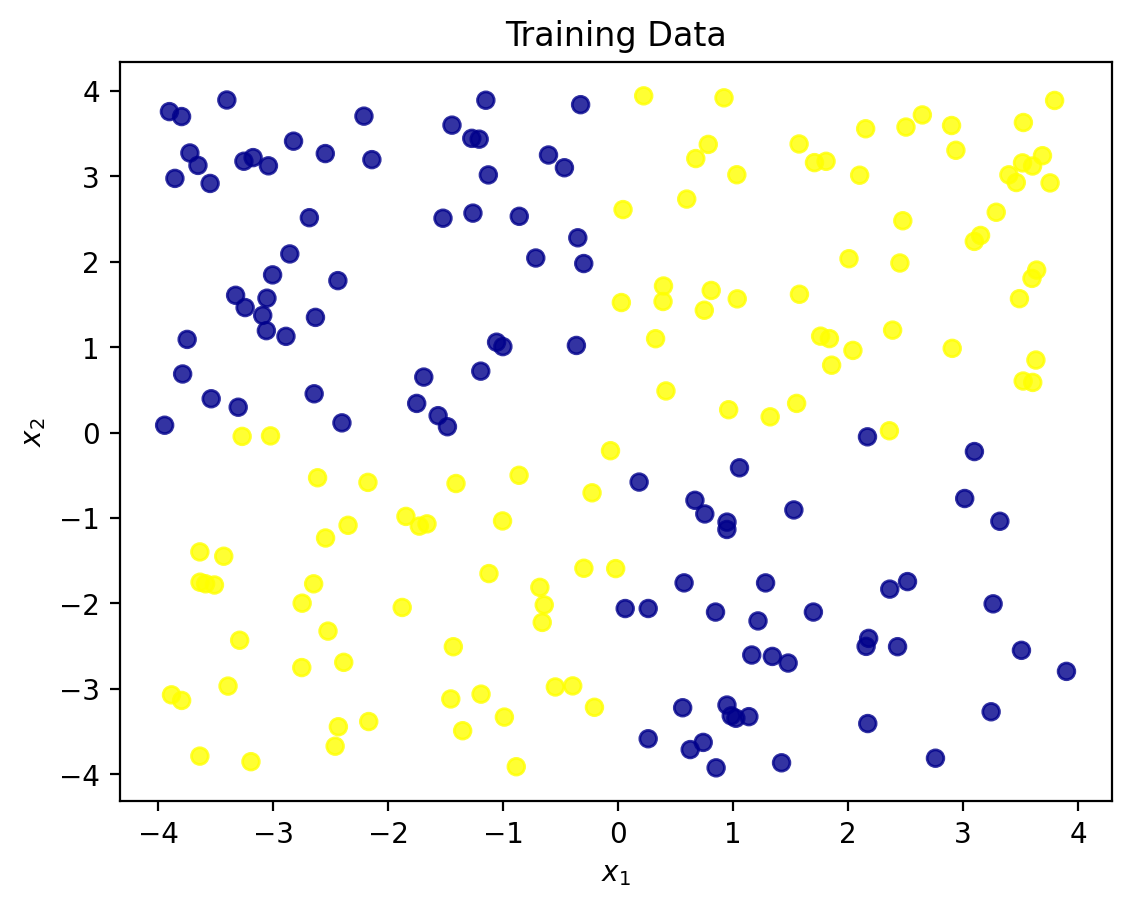

In [ ]:
colors = ['yellow' if label == 0 else 'darkblue' for label in y_train]
plt.scatter(x_train[:, 0], x_train[:, 1], c=colors, alpha=0.8)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Training Data')

Text(0.5, 1.0, 'Test Data')

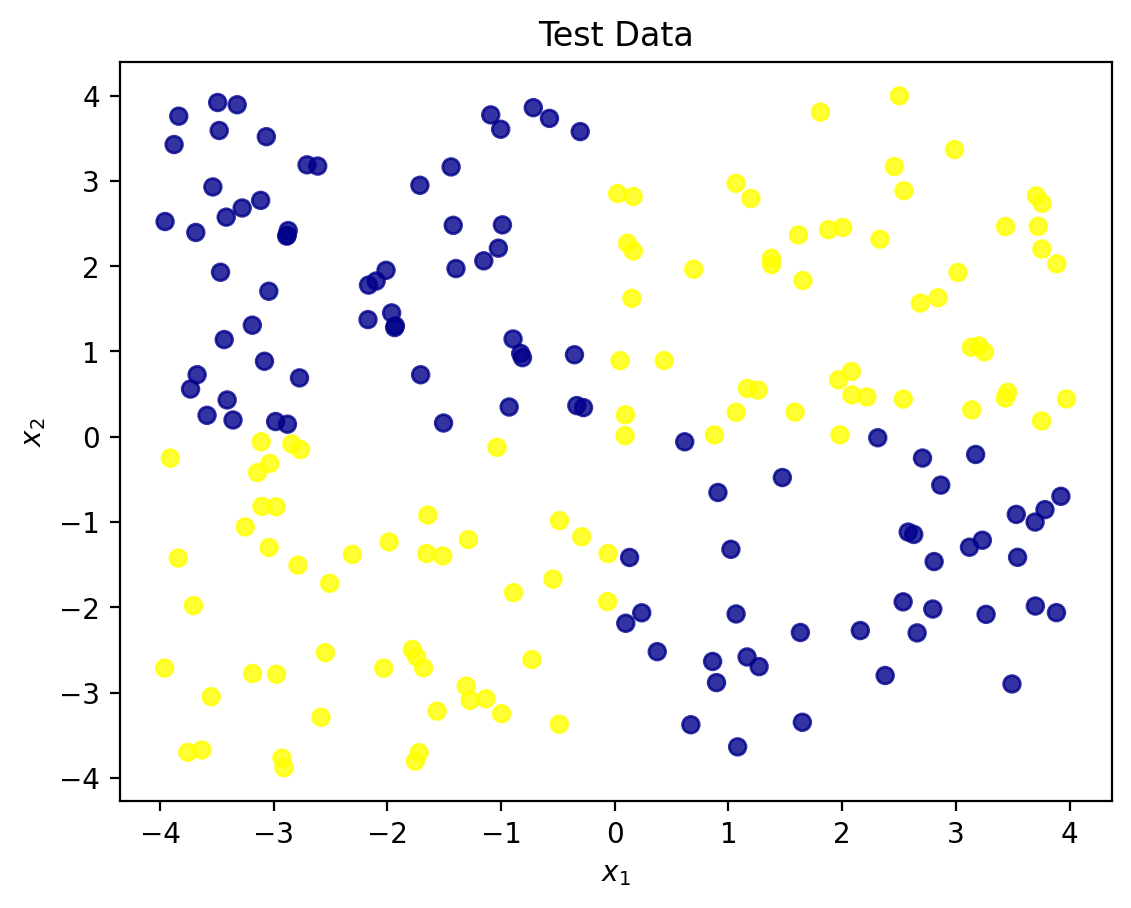

In [ ]:
colors = ['yellow' if label == 0 else 'darkblue' for label in y_test]
plt.scatter(x_test[:, 0], x_test[:, 1], c=colors, alpha=0.8)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Test Data')

Part (a) Using MLP

Analyzing untrained model:
MLP Test Accuracy: 0.4400
Loss: 1.1509
9600/9600 [==============================] - 15s 2ms/step


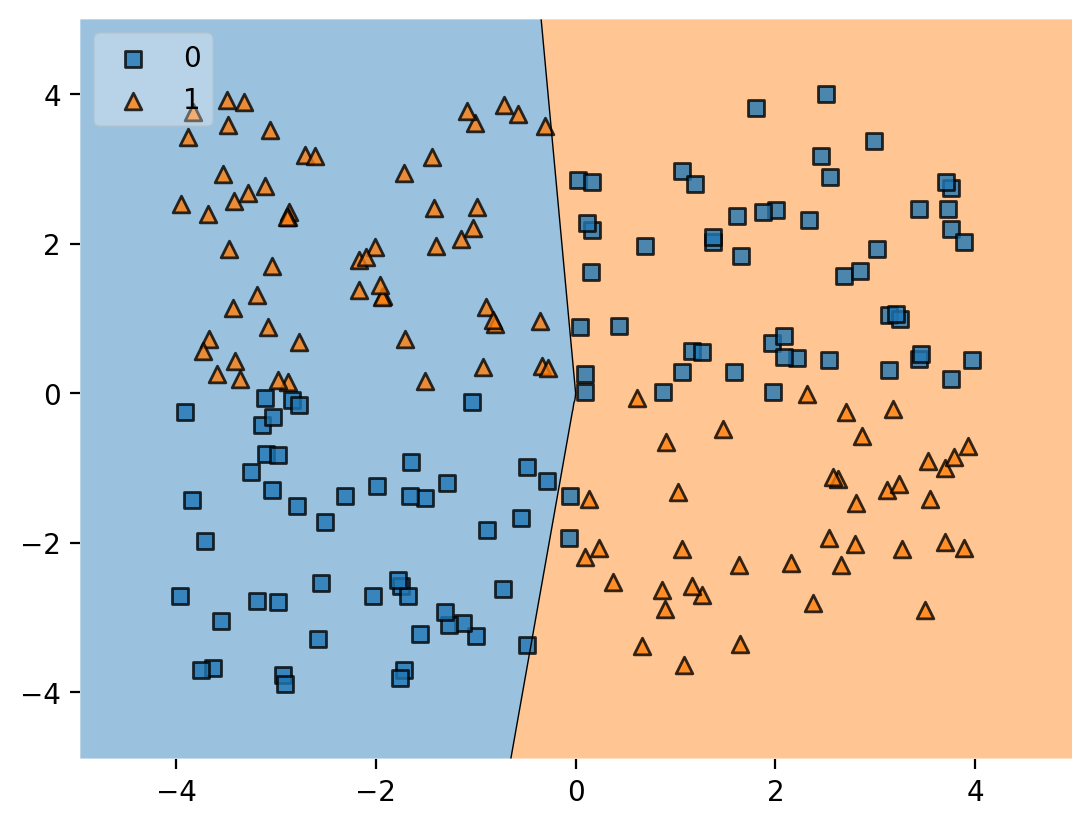

Training...
Prediction:
MLP Test Accuracy: 0.9800
Loss: 0.0568
9600/9600 [==============================] - 13s 1ms/step


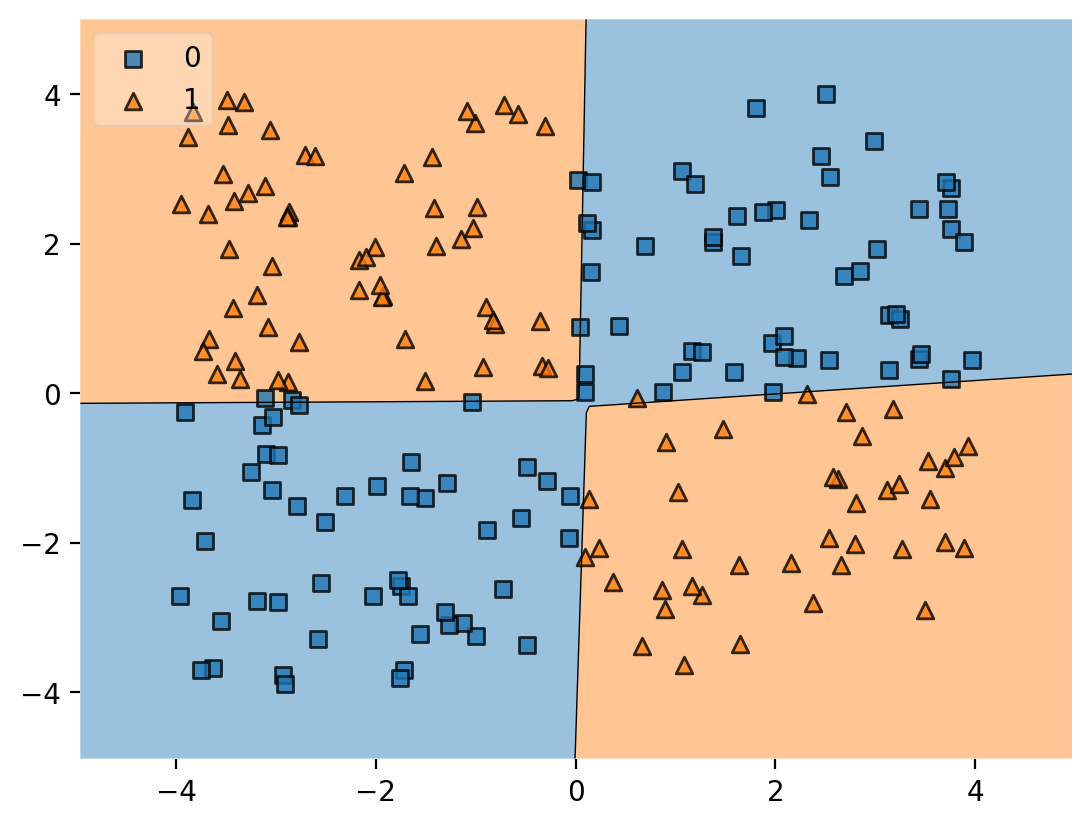

In [195]:
model_mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Analyzing untrained model
loss_untrained, acc_untrained = model_mlp.evaluate(x_test, y_test, verbose=0)
print("Analyzing untrained model:")
print(f"MLP Test Accuracy: {acc_untrained:.4f}")
print(f"Loss: {loss_untrained:.4f}")
plot_decision_regions(x_test, y_test, clf=model_mlp, legend=2)
plt.show()

print("Training...")
model_mlp.fit(x_train, y_train, epochs=1000, verbose=0)

test_loss, test_acc = model_mlp.evaluate(x_test, y_test, verbose=0)
print("Prediction:")
print(f"MLP Test Accuracy: {test_acc:.4f}")
print(f"Loss: {test_loss:.4f}")
plot_decision_regions(x_test, y_test, clf=model_mlp, legend=2)
plt.show()

Part (b) MLP w/ L1 regularization

Analyzing untrained model:
MLP with L1 Regularization Test Accuracy: 0.3050
Loss: 2.1395
9600/9600 [==============================] - 13s 1ms/step


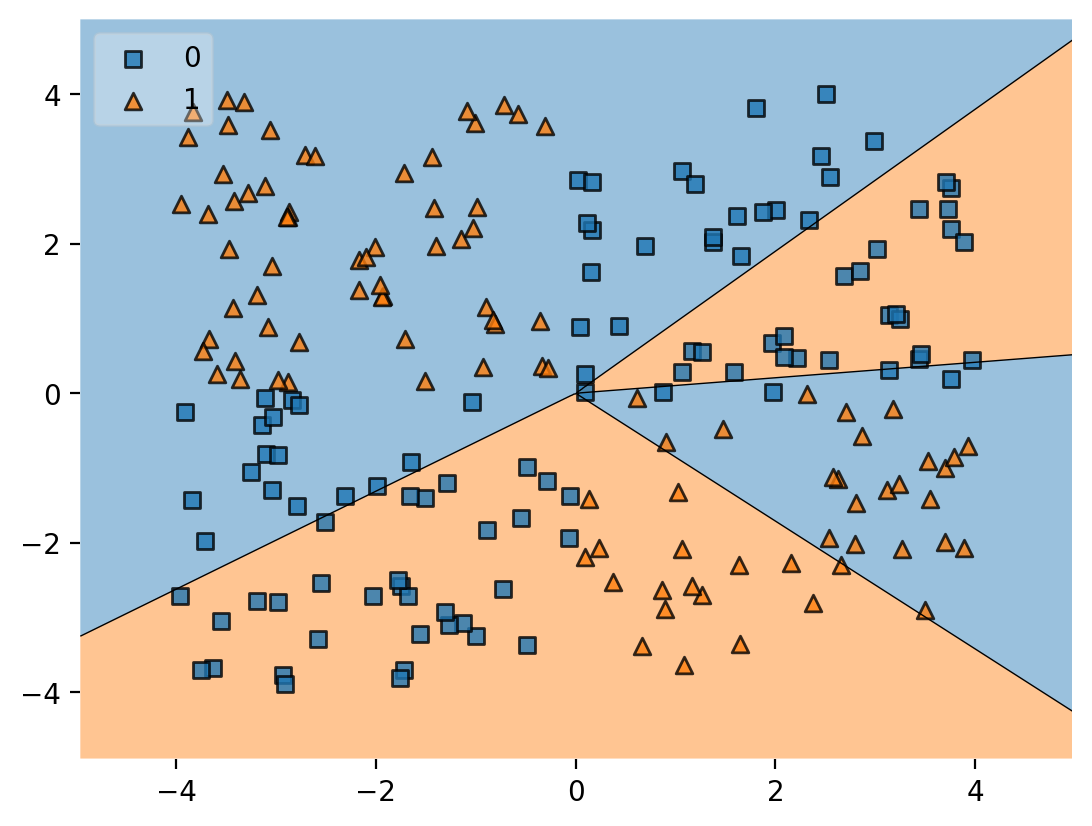

Training...
Prediction:
MLP with L1 Regularization Test Accuracy: 0.9700
Loss: 0.2063
9600/9600 [==============================] - 13s 1ms/step


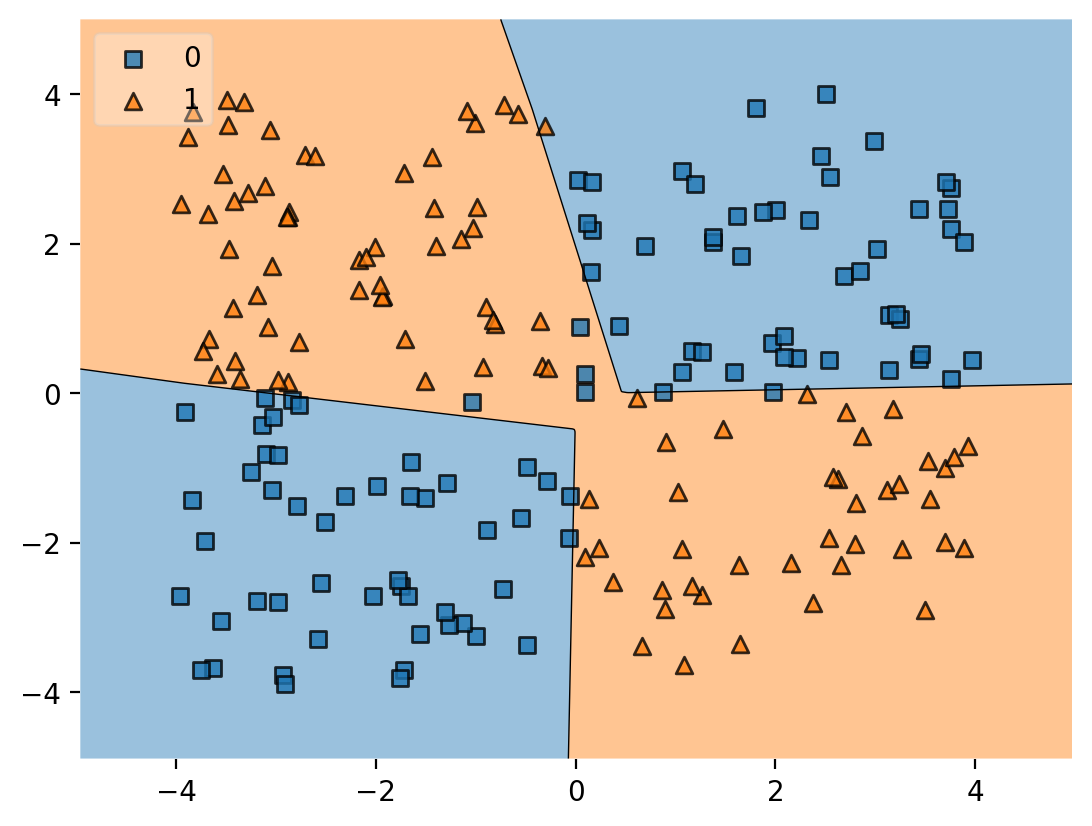

In [ ]:
model_mlp_l1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(2,), kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_mlp_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Analyzing untrained model
loss_untrained, acc_untrained = model_mlp_l1.evaluate(x_test, y_test, verbose=0)
print("Analyzing untrained model:")
print(f"MLP with L1 Regularization Test Accuracy: {acc_untrained:.4f}")
print(f"Loss: {loss_untrained:.4f}")
plot_decision_regions(x_test, y_test, clf=model_mlp_l1, legend=2)
plt.show()

print("Training...")
model_mlp_l1.fit(x_train, y_train, epochs=1000, verbose=0)

test_loss, test_acc = model_mlp_l1.evaluate(x_test, y_test, verbose=0)
print("Prediction:")
print(f"MLP with L1 Regularization Test Accuracy: {test_acc:.4f}")
print(f"Loss: {test_loss:.4f}")
plot_decision_regions(x_test, y_test, clf=model_mlp_l1, legend=2)
plt.show()

Part (c) MLP w/ L2 regularization

Analyzing untrained model:
MLP with L2 Regularization Test Accuracy: 0.4850
Loss: 0.7437
9600/9600 [==============================] - 14s 1ms/step


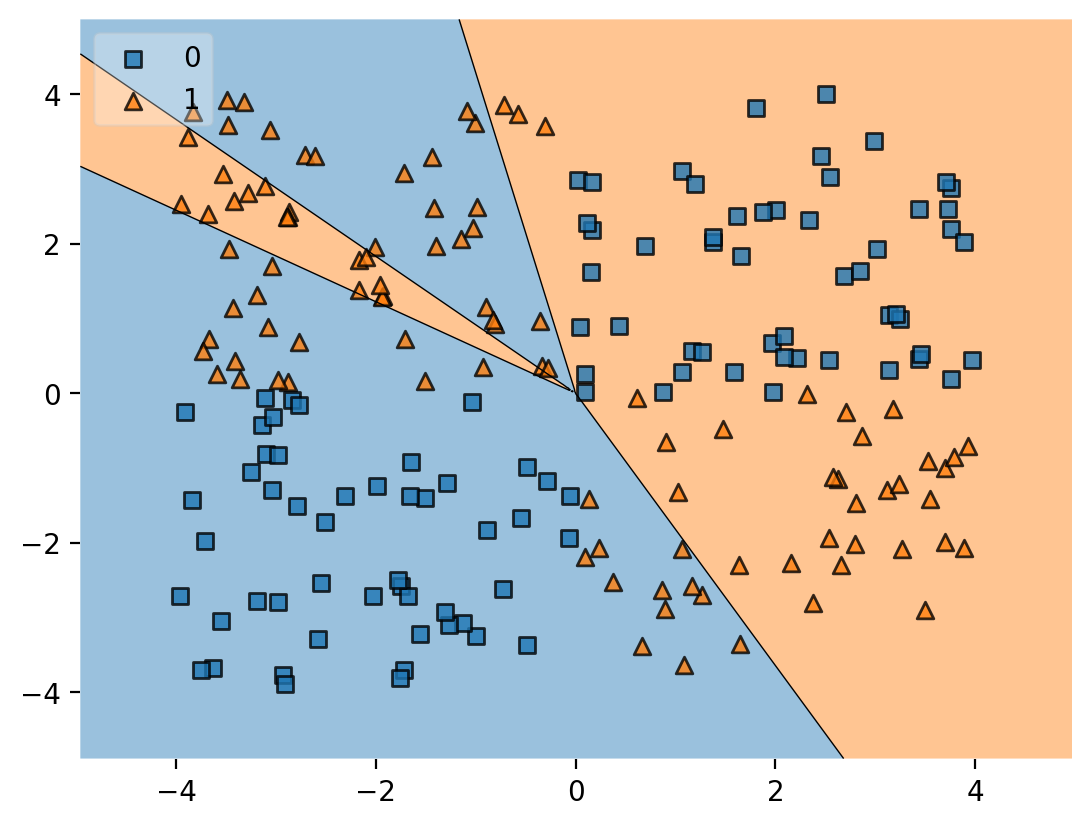

Training...
Prediction:
MLP with L2 Regularization Test Accuracy: 0.9850
Loss: 0.1405
9600/9600 [==============================] - 13s 1ms/step


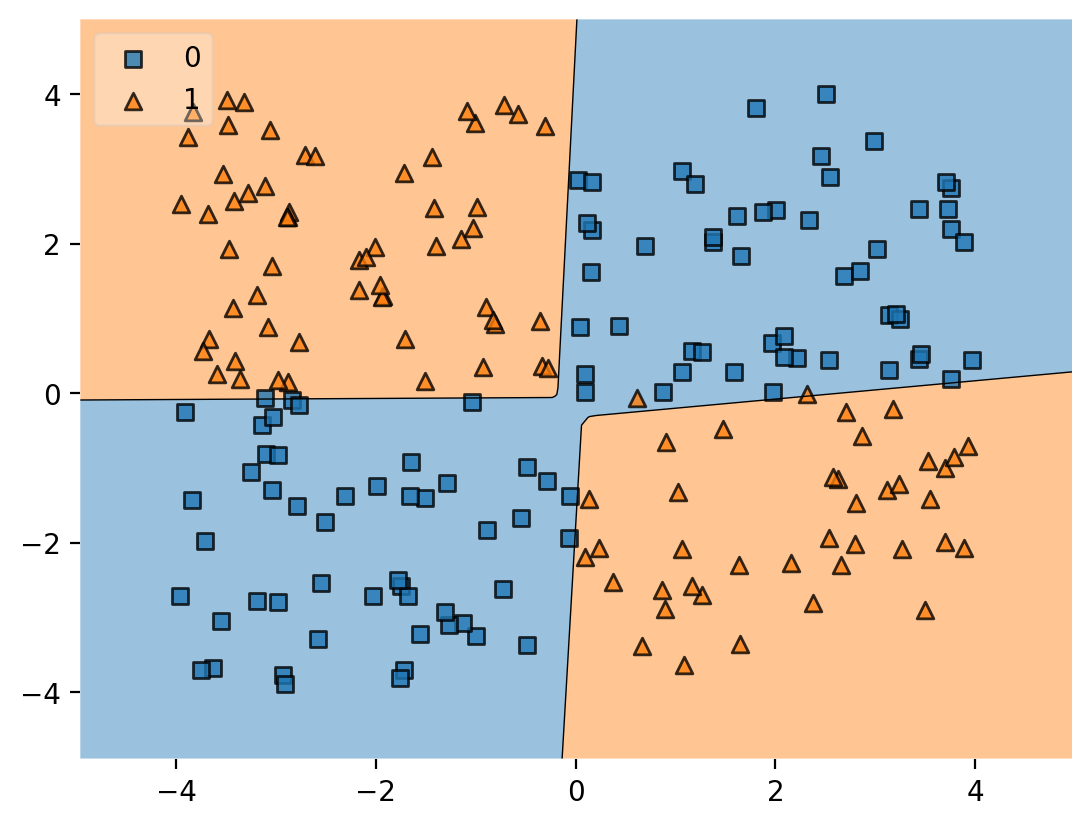

In [ ]:
model_mlp_l2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(2,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_mlp_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Analyzing untrained model
loss_untrained, acc_untrained = model_mlp_l2.evaluate(x_test, y_test, verbose=0)
print("Analyzing untrained model:")
print(f"MLP with L2 Regularization Test Accuracy: {acc_untrained:.4f}")
print(f"Loss: {loss_untrained:.4f}")
plot_decision_regions(x_test, y_test, clf=model_mlp_l2, legend=2)
plt.show()

print("Training...")
model_mlp_l2.fit(x_train, y_train, epochs=1000, verbose=0)

test_loss, test_acc = model_mlp_l2.evaluate(x_test, y_test, verbose=0)
print("Prediction:")
print(f"MLP with L2 Regularization Test Accuracy: {test_acc:.4f}")
print(f"Loss: {test_loss:.4f}")
plot_decision_regions(x_test, y_test, clf=model_mlp_l2, legend=2)
plt.show()

Varying the penalty coefficient by choosing the best one using a validation dataset

In [ ]:
X_train, X_val, Y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)


penalty_coefficients = [0.001, 0.01, 0.1, 1.0]

best_l1_penalty = None
best_l1_acc = 0.0


for l1_penalty in penalty_coefficients:
    model_mlp_l1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(8, activation='relu', input_shape=(2,), kernel_regularizer=tf.keras.regularizers.l1(l1_penalty)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model_mlp_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model_mlp_l1.fit(X_train, Y_train, epochs=1000, verbose=0)

    val_loss, val_acc = model_mlp_l1.evaluate(X_val, y_val, verbose=0)

    print(f"L1 Penalty: {l1_penalty:.3f} | Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_l1_acc:
        best_l1_acc = val_acc
        best_l1_penalty = l1_penalty

print(f"Best L1 Penalty: {best_l1_penalty:.3f} | Best L1 Accuracy: {best_l1_acc:.4f}")

best_l2_penalty = None
best_l2_acc = 0.0


for l2_penalty in penalty_coefficients:
    model_mlp_l2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(8, activation='relu', input_shape=(2,), kernel_regularizer=tf.keras.regularizers.l2(l2_penalty)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model_mlp_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model_mlp_l2.fit(X_train, Y_train, epochs=1000, verbose=0)

    val_loss, val_acc = model_mlp_l2.evaluate(X_val, y_val, verbose=0)

    print(f"L2 Penalty: {l2_penalty:.3f} | Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_l2_acc:
        best_l2_acc = val_acc
        best_l2_penalty = l2_penalty

print(f"Best L2 Penalty: {best_l2_penalty:.3f} | Best L2 Accuracy: {best_l2_acc:.4f}")

L1 Penalty: 0.001 | Validation Accuracy: 1.0000
L1 Penalty: 0.010 | Validation Accuracy: 0.9875
L1 Penalty: 0.100 | Validation Accuracy: 0.8625
L1 Penalty: 1.000 | Validation Accuracy: 0.5625
Best L1 Penalty: 0.001 | Best L1 Accuracy: 1.0000
L2 Penalty: 0.001 | Validation Accuracy: 1.0000
L2 Penalty: 0.010 | Validation Accuracy: 0.9875
L2 Penalty: 0.100 | Validation Accuracy: 0.9750
L2 Penalty: 1.000 | Validation Accuracy: 0.9250
Best L2 Penalty: 0.001 | Best L2 Accuracy: 1.0000


Using the best penalty obtained above for L1 regularisation

MLP with L1 Regularization Test Accuracy: 0.9900
Loss: 0.0761
9600/9600 [==============================] - 13s 1ms/step


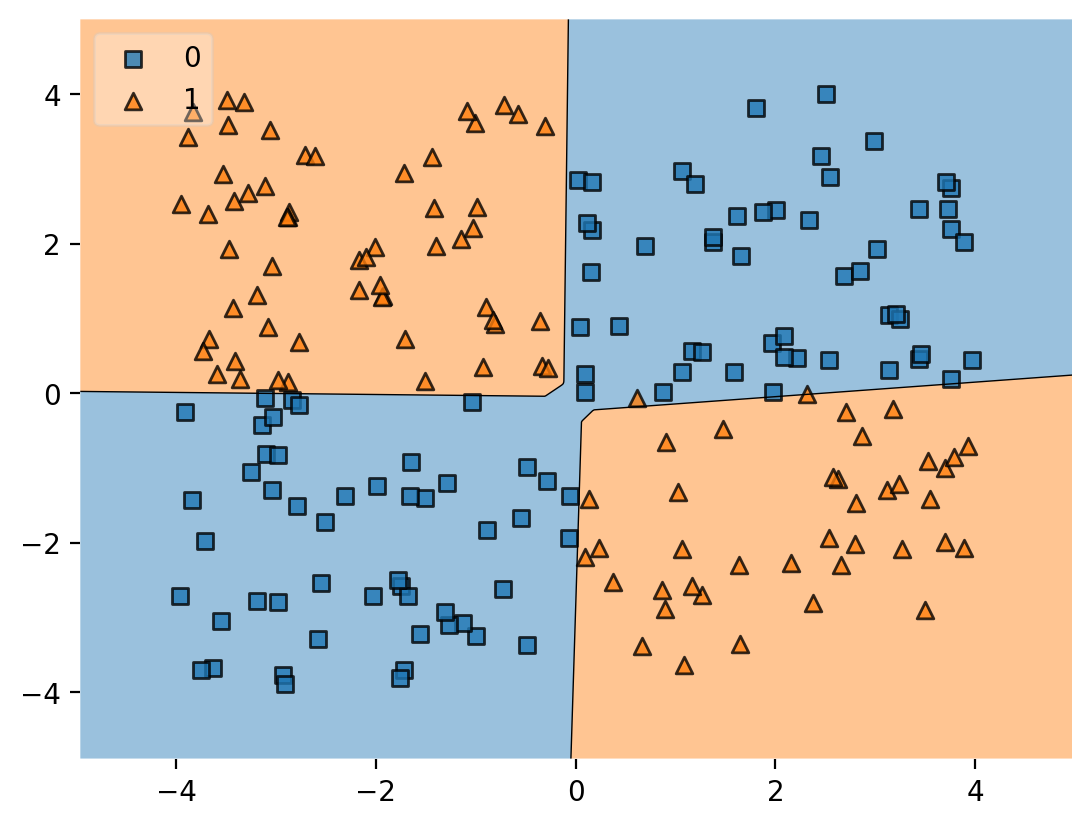

In [ ]:
model_mlp_l1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(2,), kernel_regularizer=tf.keras.regularizers.l1(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_mlp_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_mlp_l1.fit(x_train, y_train, epochs=1000, verbose=0)

test_loss, test_acc = model_mlp_l1.evaluate(x_test, y_test, verbose=0)

print(f"MLP with L1 Regularization Test Accuracy: {test_acc:.4f}")
print(f"Loss: {test_loss:.4f}")
plot_decision_regions(x_test, y_test, clf=model_mlp_l1, legend=2)
plt.show()

Using the best penalty obtained above for L2 regularisation

MLP with L2 Regularization Test Accuracy: 0.9900
Loss: 0.0788
9600/9600 [==============================] - 13s 1ms/step


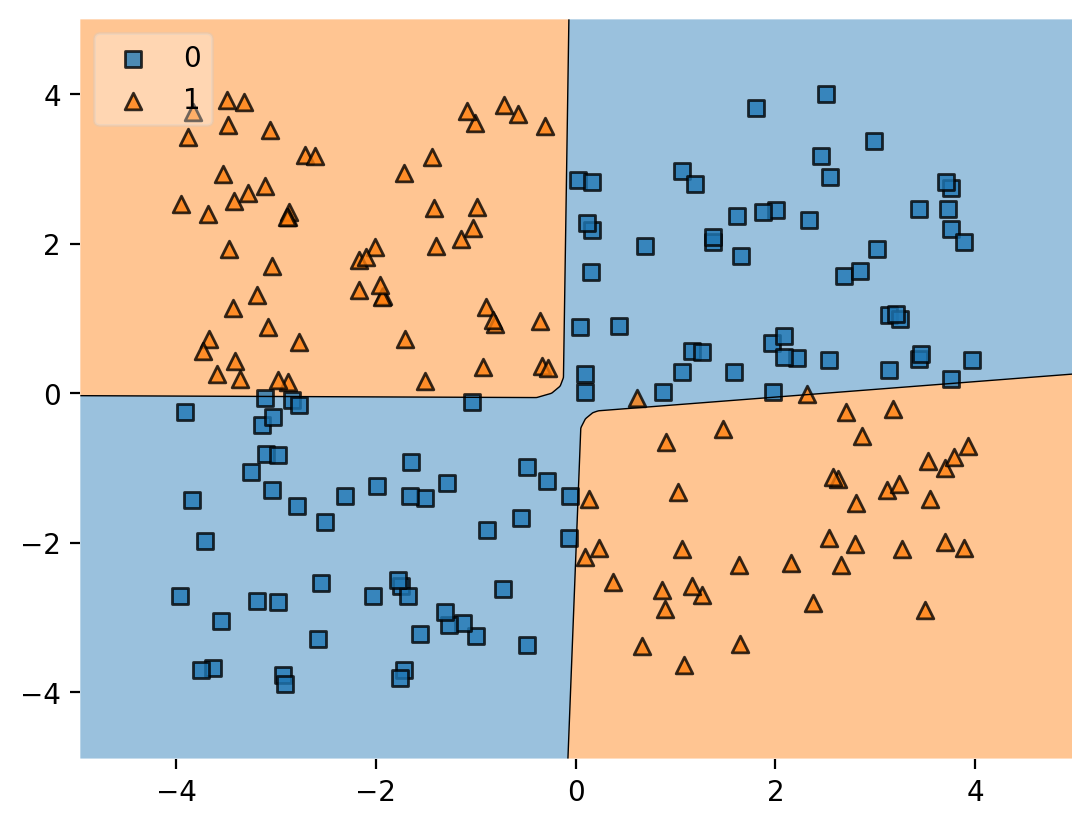

In [ ]:
model_mlp_l2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(2,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_mlp_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_mlp_l2.fit(x_train, y_train, epochs=1000, verbose=0)

test_loss, test_acc = model_mlp_l2.evaluate(x_test, y_test, verbose=0)

print(f"MLP with L2 Regularization Test Accuracy: {test_acc:.4f}")
print(f"Loss: {test_loss:.4f}")
plot_decision_regions(x_test, y_test, clf=model_mlp_l2, legend=2)
plt.show()

Part (d) Logistic Regression

Using x1 and x2 as features

In [ ]:
clf1 = LogisticRegression(random_state=42)

clf1.fit(x_train, y_train.T)

LogisticRegression(random_state=42)

In [ ]:
clf1.coef_   #weights

array([[-0.33147031,  0.0335333 ]])

In [ ]:
clf1.intercept_  #bias

array([-0.0822203])

In [ ]:
X = np.vstack((x_test[:,0], x_test[:,1])).T
X.shape

(200, 2)

Accuracy: 56.50%
Precision for Class 1: 0.55
Precision for Class 0: 0.58


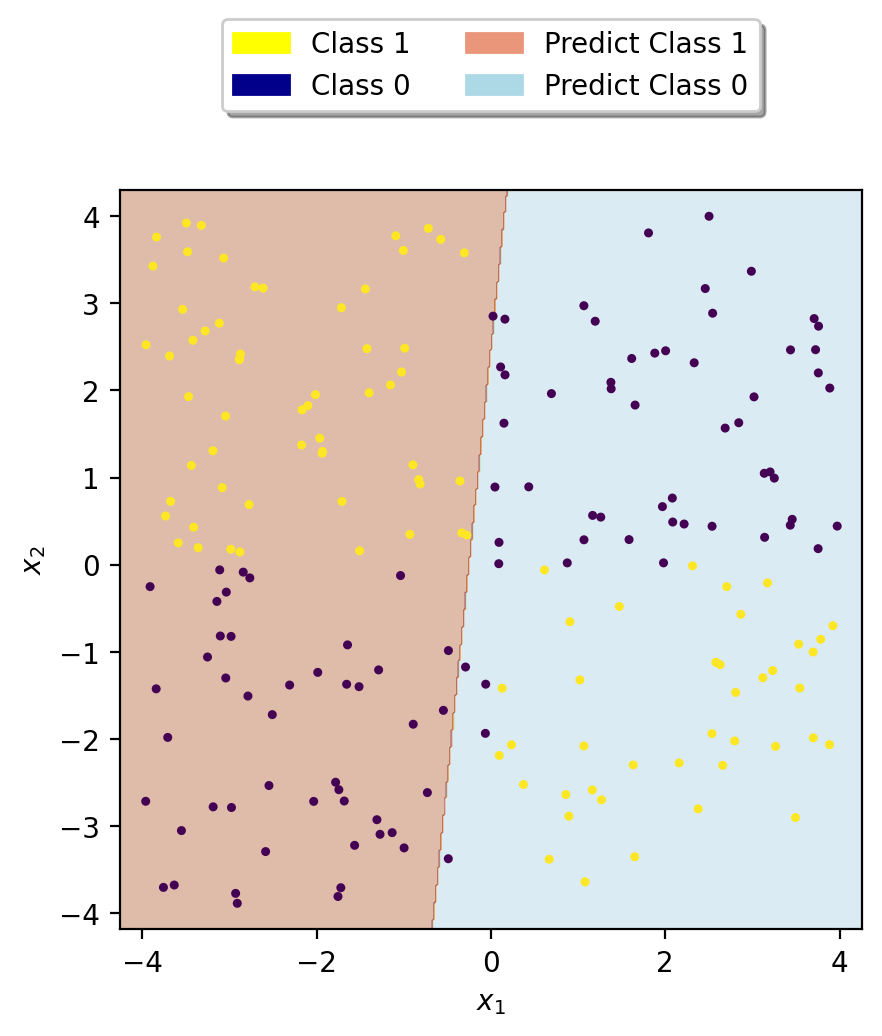

In [ ]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])

print("Accuracy: {:.2f}%".format(clf1.score(x_test,y_test)*100))
y_hat1 = clf1.predict(x_test)
print("Precision for Class 1: {:.2f}".format(np.sum((y_hat1==1)&(y_test==1))/np.sum(y_hat1==1)))
print("Precision for Class 0: {:.2f}".format(np.sum((y_hat1==0)&(y_test==0))/np.sum(y_hat1==0)))


# Put the result into a color plot
Z = Z.reshape(xx.shape)
yellow_patch = mpatches.Patch(color='yellow', label='Class 1')
blue_patch = mpatches.Patch(color='darkblue', label='Class 0')
pink_patch = mpatches.Patch(color='darksalmon', label='Predict Class 1')
lblue_patch = mpatches.Patch(color='lightblue', label='Predict Class 0')
plt.legend(handles=[yellow_patch, blue_patch, pink_patch, lblue_patch], loc='upper center',
           bbox_to_anchor=(0.5, 1.25),
          ncol=2, fancybox=True, shadow=True)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.gca().set_aspect('equal')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test,s=5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.gca().set_aspect('equal')

Using $x_1$, $x_2$, $x_1^2$, $x_2^2$ as features

In [ ]:
new_x2 = np.zeros((4, 200))

new_x2[0] = x_train[:,0]
new_x2[1] = x_train[:,1]
new_x2[2] = x_train[:,0]**2
new_x2[3] = x_train[:,1]**2

clf2 = LogisticRegression(random_state=42)
clf2.fit(new_x2.T, y_train.T)

LogisticRegression(random_state=42)

In [ ]:
clf2.intercept_  #bias

array([-0.02709684])

In [ ]:
clf2.coef_   #weights

array([[-0.33287027,  0.06707053, -0.15747086,  0.09847617]])

In [ ]:
X = np.vstack((x_test[:,0], x_test[:,1])).T
X.shape

(200, 2)

Accuracy: 55.00%
Precision for Class 1: 0.54
Precision for Class 0: 0.56


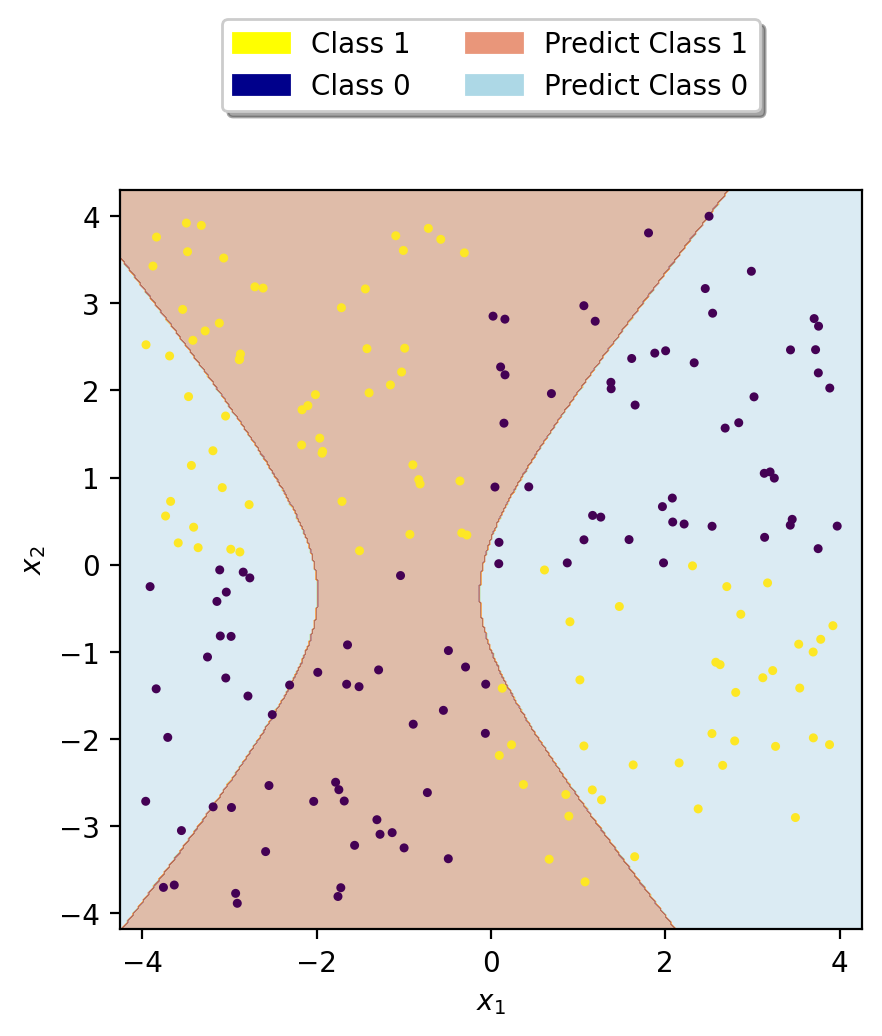

In [ ]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf2.predict(np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())])

new_x2_test = np.zeros((4, 200))
new_x2_test[0] = x_test[:,0]
new_x2_test[1] = x_test[:,1]
new_x2_test[2] = x_test[:,0]**2
new_x2_test[3] = x_test[:,1]**2
print("Accuracy: {:.2f}%".format(clf2.score(new_x2_test.T,y_test)*100))
y_hat2 = clf2.predict(new_x2_test.T)
print("Precision for Class 1: {:.2f}".format(np.sum((y_hat2==1)&(y_test==1))/np.sum(y_hat2==1)))
print("Precision for Class 0: {:.2f}".format(np.sum((y_hat2==0)&(y_test==0))/np.sum(y_hat2==0)))

# Put the result into a color plot
Z = Z.reshape(xx.shape)

yellow_patch = mpatches.Patch(color='yellow', label='Class 1')
blue_patch = mpatches.Patch(color='darkblue', label='Class 0')
pink_patch = mpatches.Patch(color='darksalmon', label='Predict Class 1')
lblue_patch = mpatches.Patch(color='lightblue', label='Predict Class 0')
plt.legend(handles=[yellow_patch, blue_patch, pink_patch, lblue_patch], loc='upper center',
           bbox_to_anchor=(0.5, 1.25),
          ncol=2, fancybox=True, shadow=True)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.gca().set_aspect('equal')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test,s=5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.gca().set_aspect('equal')

Using $x_1$, $x_2$, $x_1*x_2$, $x_1^2$ features

In [ ]:
new_x3 = np.zeros((4, 200))
new_x3[0] = x_train[:,0]
new_x3[1] = x_train[:,1]
new_x3[2] = x_train[:,0]*x_train[:,1]
new_x3[3] = x_train[:,0]**2

# clf3 = LogisticRegression(penalty='none',solver='newton-cg')
clf3 = LogisticRegression(random_state=42)
clf3.fit(new_x3.T, y_train.T)

LogisticRegression(random_state=42)

In [ ]:
clf3.intercept_  #bias

array([-0.12007369])

In [ ]:
clf3.coef_   #weights

array([[-0.54396294,  0.2602992 , -4.85374584,  0.1432553 ]])

In [ ]:
X = np.vstack((x_test[:,0], x_test[:,1])).T
X.shape

(200, 2)

Accuracy: 97.00%
Precision for Class 1: 0.96
Precision for Class 0: 0.98


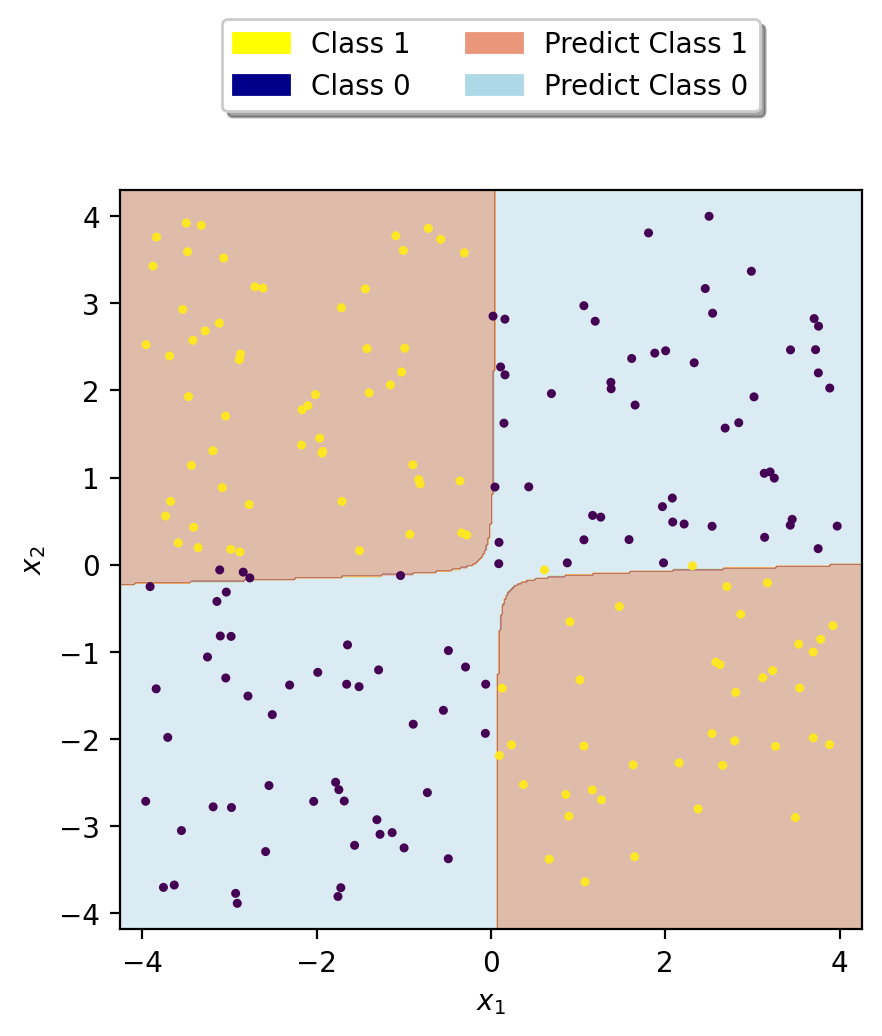

In [ ]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf3.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel()*yy.ravel(), np.square(xx.ravel())])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

new_x3_test = np.zeros((4, 200))
new_x3_test[0] = x_test[:,0]
new_x3_test[1] = x_test[:,1]
new_x3_test[2] = x_test[:,0]*x_test[:,1]
new_x3_test[3] = x_test[:,0]**2
print("Accuracy: {:.2f}%".format(clf3.score(new_x3_test.T,y_test)*100))
y_hat3 = clf3.predict(new_x3_test.T)
print("Precision for Class 1: {:.2f}".format(np.sum((y_hat3==1)&(y_test==1))/np.sum(y_hat3==1)))
print("Precision for Class 0: {:.2f}".format(np.sum((y_hat3==0)&(y_test==0))/np.sum(y_hat3==0)))

yellow_patch = mpatches.Patch(color='yellow', label='Class 1')
blue_patch = mpatches.Patch(color='darkblue', label='Class 0')
pink_patch = mpatches.Patch(color='darksalmon', label='Predict Class 1')
lblue_patch = mpatches.Patch(color='lightblue', label='Predict Class 0')
plt.legend(handles=[yellow_patch, blue_patch, pink_patch, lblue_patch], loc='upper center',
           bbox_to_anchor=(0.5, 1.25),
          ncol=2, fancybox=True, shadow=True)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.gca().set_aspect('equal')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test,s=5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.gca().set_aspect('equal')

### Comments for graphs obtained in MLP
The MLP model gave a high accuracy over the test data. $L_1$ and $L_2$ regularizations prevent overfitting in neural networks and improve the accuracy of predictions over the test data.

We can see that here the train data was generated in a particular range and so it did not have mcuh outliers.

So, while training the MLP without regularisation also does not incur overfitting. This is teh reason why the accuracies of MLP with and without $L_1$ and $L_2$ regularizations are all high and close. Since the amount of was very less.

The accuracy of classification increased for both $L_1$ and $L_2$ regularizations after varying the penalty coefficient by choosing the best one using a validation dataset.


### Comments for graphs obtained in Logistic Regression
When only $x_1$ and $x_2$ are used as features the accuracy is low and the decision boundary is a straight line. It does not perform well since xor dataset is not linearly separable.

When $x_1$, $x_2$, $x_1^2$, $x_2^2$ as features the decision boundary is some curve but the accuracy and per class precision are still low.

When we use $x_1$, $x_2$, $x_1*x_2$, $x_1^2$ features we get a near to perfect classification with a very high accuracy and precision. This happens beacuse after including the feature $x_1*x_2$ the xor dataset becomes linearly separable in a higher dimensional space.